# Linear Discriminant Analysis

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels

In [47]:
data_default = pd.read_csv("default.csv",usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [48]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
data_default_dummies.head(5)

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [49]:
np.unique(data_default_dummies.default_Yes, return_counts = True) 

(array([0, 1], dtype=uint8), array([9667,  333]))

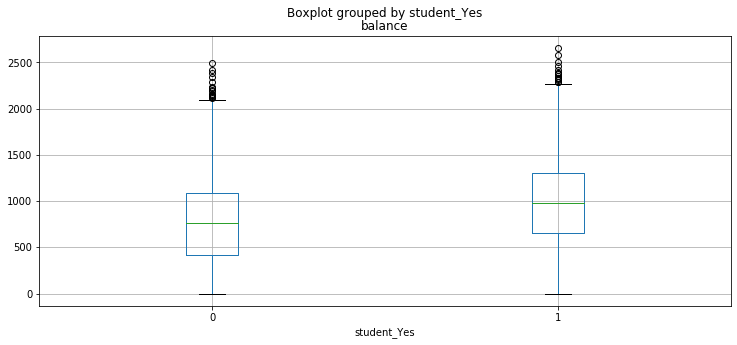

In [50]:
data_default_dummies.boxplot("balance","student_Yes", figsize = (12,5))
plt.show()

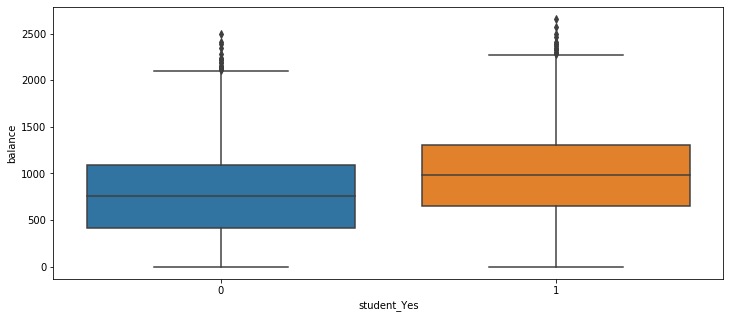

In [51]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
plt.show()

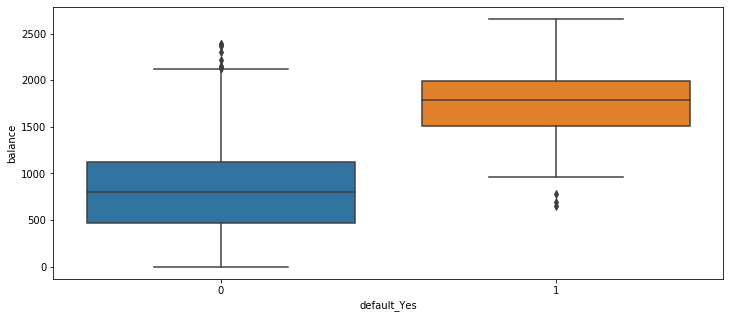

In [52]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
plt.show()

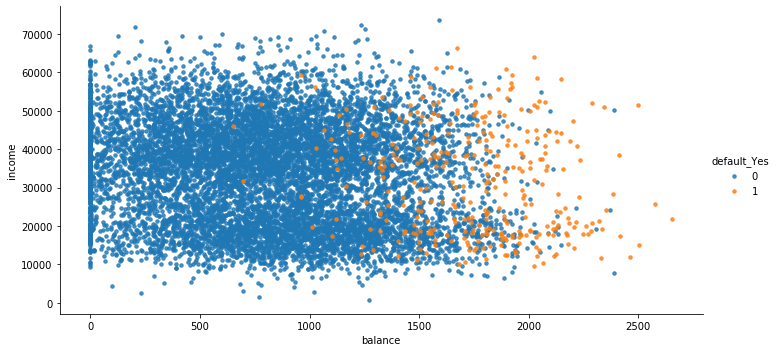

In [53]:
sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
           hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [119]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes

In [120]:
y = y.values

In [121]:
print(y)

[0 0 0 ... 0 0 0]


In [122]:
lda = LinearDiscriminantAnalysis(tol = 0.0000001)
mod_lda = lda.fit(X,y)

In [123]:
print("The model is:", mod_lda)
print("Model Score:", mod_lda.score(X,y))

The model is: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=1e-07)
Model Score: 0.9724


Predict will give either 0 or 1 as output; Predict_proba will give the only probability of 1.

In [124]:
pred = mod_lda.predict(X)
pred_prob = mod_lda.predict_proba(X) 
actual = y

In [125]:
print(pred)

[0 0 0 ... 0 0 0]


In [126]:
print(pred_prob)
np.unique(pred, return_counts = True)

[[9.96776483e-01 3.22351679e-03]
 [9.97310469e-01 2.68953133e-03]
 [9.85291400e-01 1.47085998e-02]
 ...
 [9.93867912e-01 6.13208754e-03]
 [8.62826402e-01 1.37173598e-01]
 [9.99846451e-01 1.53549027e-04]]


(array([0, 1], dtype=uint8), array([9899,  101]))

In [127]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [129]:
tn, fp, fn, tp = confusion_matrix(y_true = actual, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

9645 22 254 79


In [130]:
conf_matrix = confusion_matrix(y_true = actual, y_pred = pred)

In [131]:
print(conf_matrix)

[[9645   22]
 [ 254   79]]


Confusion matrix, without normalization
[[9645   22]
 [ 254   79]]


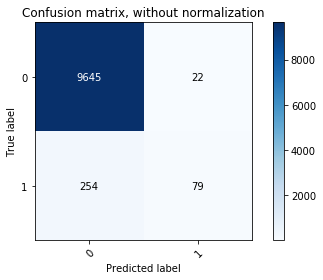

In [75]:
plot_confusion_matrix(y_true = actual, y_pred = pred, classes = np.array([0,1]))
plt.show()

In [83]:
print(classification_report(actual, pred, digits = 6))

              precision    recall  f1-score   support

           0   0.974341  0.997724  0.985894      9667
           1   0.782178  0.237237  0.364055       333

    accuracy                       0.972400     10000
   macro avg   0.878260  0.617481  0.674975     10000
weighted avg   0.967942  0.972400  0.965187     10000



In [84]:
fpr, tpr, thresholds = roc_curve(y_true = actual, y_score = pred_prob[:,0], pos_label = 0)
print(auc(fpr,tpr))

0.9495202246831502


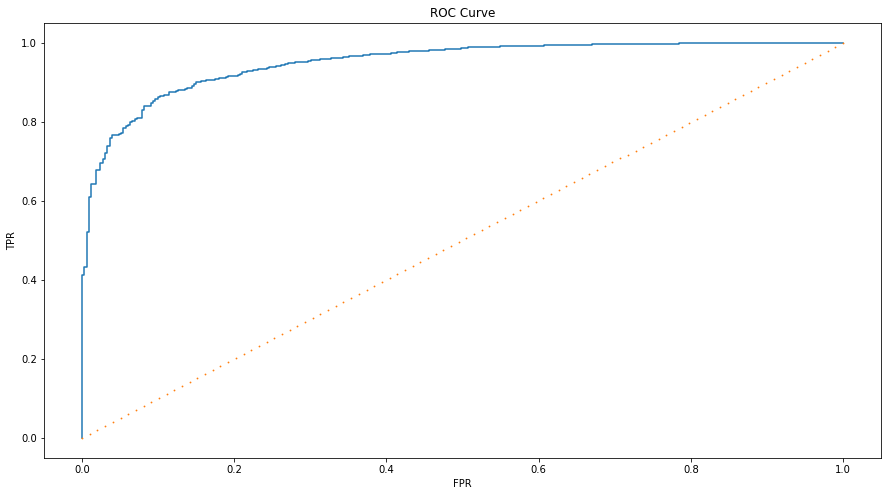

In [89]:
x = np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(fpr, tpr) 
plt.plot(x,x,".", markersize = 1.6) 
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [97]:
precision, recall, thresholds = precision_recall_curve(y_true = actual, probas_pred = pred_prob[:,1], pos_label = 1)

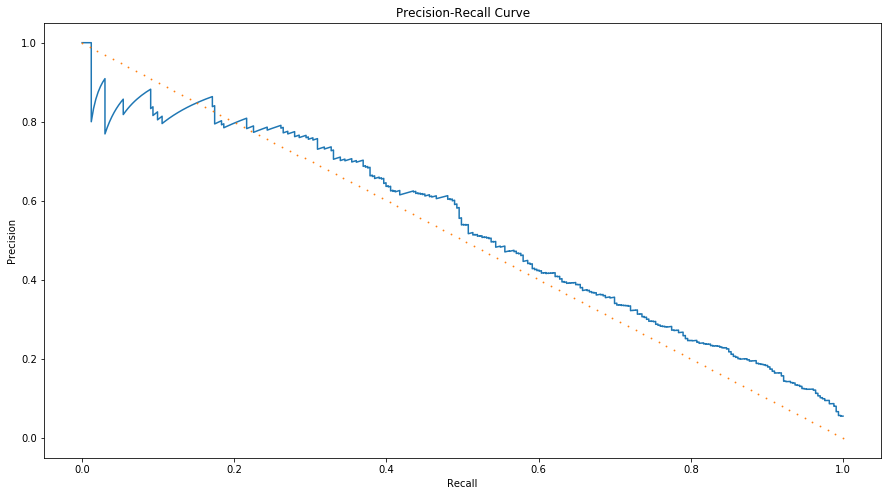

In [98]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(recall, precision) 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [99]:
average_precision_score(y_true = actual, y_score = pred_prob[:,1])

0.530073623149367

In [100]:
print(pred_prob[:,1])

[0.00322352 0.00268953 0.0147086  ... 0.00613209 0.1371736  0.00015355]
